In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def value(theta, X_b, y):
    """总的损失(以均方误差损失函数为例)的值"""
    return ((y - (X_b @ theta)).T @ (y - (X_b @ theta))) / len(y)

def my_sgd(X_b, y, 
           initial_theta, # 初始值
           n_iters=10, # 训练轮数
           t0=5,
           t1=50):
    
    def d_value_sgd(theta, X_b_i, y_i):
        """单个样本的损失函数(以均方误差损失函数为例)"""
        return X_b_i * (X_b_i.dot(theta) - y_i) * 2.
    
    def learning_rate(t):
        """学习率衰减"""
        return t0 / (t + t1) # 没有对学习率进行一维搜索

    theta = initial_theta
    m = len(X_b)
    for i_iter in range(n_iters):
        indexes = np.random.permutation(m) # 训练样本重新随机排序
        X_b_new = X_b[indexes,:]
        y_new = y[indexes]
        for i in range(m):
            gradient = d_value_sgd(theta, X_b_new[i], y_new[i])
            theta = theta - learning_rate(i_iter * m + i) * gradient

    return theta

In [3]:
p = 1000
q = 50 # 特征数量

x_trian = np.random.normal(size=(p, q))
x_trian = np.hstack((x_trian, np.ones((p, 1))))
true_theta = np.array(random.sample(range(1, 52), 51)) # 模型包含截距项
y_trian = x_trian.dot(true_theta) + np.random.normal(0., 1., size=p)
initial_theta = np.ones(true_theta.shape)

In [4]:
%%time
my_sgd(x_trian, y_trian, initial_theta=initial_theta, n_iters=10) # 随机梯度下降收敛速度非常快(相比于批量梯度下降法)

Wall time: 101 ms


array([ 3.95922242, 44.2033215 ,  9.34576516, 26.87583351,  3.6904358 ,
       49.1445369 , 15.05374289, 23.42473974, 34.96786468,  0.54911998,
       31.70114488, 10.7732031 , 25.64929754, 38.23317521,  5.48846036,
       39.43406133, 11.59798941, 50.44659396, 40.78773631, 49.8492142 ,
       24.05829661, 21.1343734 , 17.27253999, 48.37637025,  2.71242788,
       36.32682665, 28.15099138, 20.48239669, 39.9857454 , 30.07989003,
       13.68166553,  5.78913325, 18.56246791, 24.33598761, 33.22932267,
       44.82607563, 46.23278783, 33.76569264, 13.39321902, 18.44192153,
       15.18493816, 30.18139612, 42.19231995,  5.38409709, 17.78198165,
       46.38738211, 29.99110122,  8.86200995, 38.06594479,  7.49956149,
       41.74276696])

In [5]:
loss = list()
for i in range(7, 21):
    predict_theta = my_sgd(x_trian, y_trian, initial_theta=initial_theta, n_iters=i)
    loss.append(value(predict_theta, x_trian, y_trian))

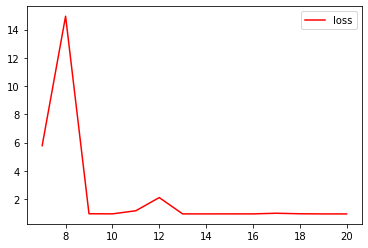

In [6]:
plt.plot(range(7, 21), loss, color='red', label='loss') # 曲线可能不稳定(由随机因素引起)
plt.legend()